In [1]:
#Visit the website below for installing talib and other packkages just incase the pip/conda method fails
#https://www.lfd.uci.edu/~gohlke/pythonlibs/
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style
import datetime
import seaborn
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import talib as ta
import tushare as ts
import warnings; warnings.simplefilter('ignore')       #忽略警告信息；
mpl.rcParams['font.family'] = 'serif'               #解决一些字体显示乱码问题
plt.style.use(['dark_background', 'fast'])

In [149]:
df = ts.get_k_data( '601777', start ='2011-1-1', end = '2019-04-23')
df.set_index('date', inplace = True)
df.index = pd.to_datetime(df.index)
df[['close','volume']].tail()

,close,volume
date,,
2019-04-16,6.81,67103.0
2019-04-17,7.49,94387.0
2019-04-18,8.24,115832.0
2019-04-19,9.06,3097577.0
2019-04-22,9.36,2567277.0


In [51]:
#df['volsig']=np.where(pd.Series(np.where(df['volume'].rolling(5).mean()>df['volume'].rolling(10).mean(),1,0)).rolling(3).sum()==3,1,0)
#df['obv']=ta.OBV(df['close'],df['volume'])
#df['obv30']=ta.OBV(df['close'],df['volume']).rolling(30).mean()
#df['obvsig']=np.where(pd.Series(np.where(df['obv']>df['obv30'],1,0)).rolling(3).sum()==3,1,0)
#df['obvsig']=np.where(df['obv']>df['obv30'],1,0)
#df['volsig']=np.where(df['volume'].rolling(5).mean()>df['volume'].rolling(10).mean(),1,0)
#df.tail()

MACD ta.MACD: Momentum
KD ta.STOCH: Momentum
RSI ta.RSI: Momentum
OBV ta.OBV: Volume

In [162]:
df['MACDdif'],df['MACDdea'],df['MACDhist'] = ta.MACD(df['close'])
df['RSI']=ta.RSI(df['close'])
df['K'],df['D'] = ta.STOCH(df['high'],df['low'],df['close'])
df['obv']=ta.OBV(df['close'],df['volume'])
df['MFI'] = ta.MFI(df['high'],df['low'],df['close'],df['volume'])

In [196]:
df.tail().round(2)

,open,close,high,low,volume,code,MACDdif,MACDdea,MACDhist,RSI,K,D,obv,MFI
date,,,,,,,,,,,,,,
2019-04-16,6.81,6.81,6.81,6.81,67103.0,601777,0.35,0.21,0.14,84.71,92.64,80.65,35340506.15,87.20
2019-04-17,7.49,7.49,7.49,7.49,94387.0,601777,0.48,0.26,0.21,88.21,100.00,90.72,35434893.15,90.97
2019-04-18,8.24,8.24,8.24,8.24,115832.0,601777,0.63,0.34,0.29,90.73,100.00,97.55,35550725.15,94.26
2019-04-19,8.66,9.06,9.06,8.33,3097577.0,601777,0.81,0.43,0.38,92.59,100.00,100.00,38648302.15,97.63
2019-04-22,8.70,9.36,9.65,8.38,2567277.0,601777,0.96,0.54,0.43,93.13,96.60,98.87,41215579.15,98.41


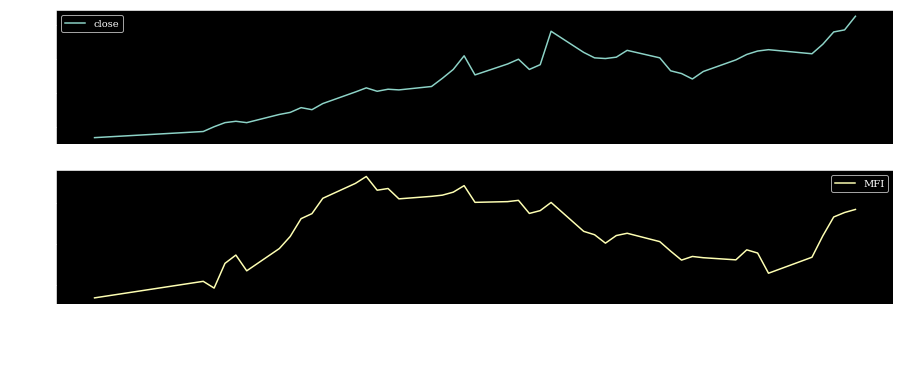

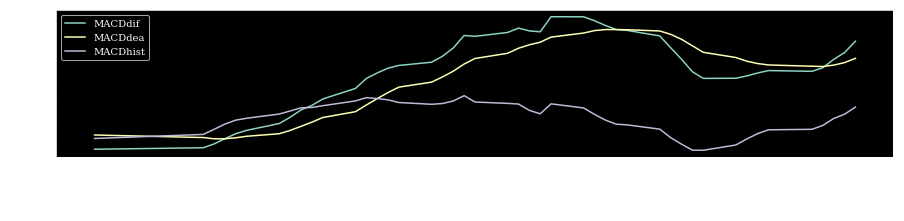

In [203]:
df.loc['2019-2-1':'2019-4-12',['close','MFI']].plot(figsize=(15,6),subplots=True)
df.loc['2019-2-1':'2019-4-12',['MACDdif','MACDdea','MACDhist']].plot(figsize=(15,3))
plt.show()

In [83]:
ta.MACD?

In [39]:
d1=df.loc[:,['volume','obv']]
d1.tail()

,volume,obv
date,,
2019-04-16,67103.0,35340506.15
2019-04-17,94387.0,35434893.15
2019-04-18,115832.0,35550725.15
2019-04-19,3097577.0,38648302.15
2019-04-22,2567277.0,41215579.15


In [185]:
df.corr().round(2)

,open,close,high,low,volume,MACDdif,MACDdea,MACDhist,RSI,K,D,obv,MFI
open,1.00,1.00,1.00,1.00,0.47,0.39,0.41,0.06,0.27,0.09,0.12,0.13,0.17
close,1.00,1.00,1.00,1.00,0.48,0.40,0.40,0.09,0.30,0.11,0.13,0.13,0.18
high,1.00,1.00,1.00,1.00,0.49,0.39,0.40,0.07,0.29,0.10,0.12,0.13,0.18
low,1.00,1.00,1.00,1.00,0.46,0.40,0.40,0.08,0.29,0.10,0.12,0.14,0.18
volume,0.47,0.48,0.49,0.46,1.00,0.15,0.07,0.24,0.37,0.24,0.25,0.27,0.31
MACDdif,0.39,0.40,0.39,0.40,0.15,1.00,0.93,0.40,0.60,0.15,0.21,-0.04,0.46
MACDdea,0.41,0.40,0.40,0.40,0.07,0.93,1.00,0.05,0.48,-0.00,0.04,-0.05,0.32
MACDhist,0.06,0.09,0.07,0.08,0.24,0.40,0.05,1.00,0.46,0.42,0.48,0.02,0.46
RSI,0.27,0.30,0.29,0.29,0.37,0.60,0.48,0.46,1.00,0.58,0.59,-0.10,0.79
K,0.09,0.11,0.10,0.10,0.24,0.15,-0.00,0.42,0.58,1.00,0.90,-0.02,0.47


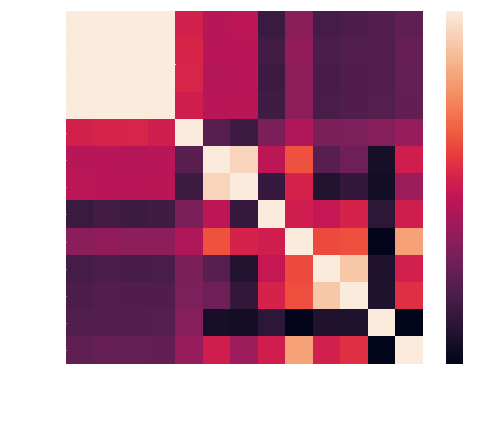

In [186]:
fig = plt.figure(figsize=(8,6.5))
seaborn.heatmap(df.corr())
plt.show()

In [189]:
df.corr(method='spearman').round(2)

,open,close,high,low,volume,MACDdif,MACDdea,MACDhist,RSI,K,D,obv,MFI
open,1.00,1.00,1.00,1.00,0.65,0.18,0.17,0.08,0.21,0.09,0.11,0.07,0.14
close,1.00,1.00,1.00,1.00,0.66,0.18,0.17,0.10,0.24,0.11,0.12,0.07,0.15
high,1.00,1.00,1.00,1.00,0.67,0.18,0.17,0.09,0.23,0.10,0.12,0.07,0.15
low,1.00,1.00,1.00,1.00,0.65,0.18,0.17,0.09,0.22,0.10,0.12,0.08,0.15
volume,0.65,0.66,0.67,0.65,1.00,0.28,0.22,0.29,0.40,0.25,0.26,0.44,0.33
MACDdif,0.18,0.18,0.18,0.18,0.28,1.00,0.92,0.32,0.82,0.20,0.28,-0.05,0.61
MACDdea,0.17,0.17,0.17,0.17,0.22,0.92,1.00,0.04,0.64,0.01,0.07,-0.08,0.42
MACDhist,0.08,0.10,0.09,0.09,0.29,0.32,0.04,1.00,0.64,0.60,0.68,0.05,0.72
RSI,0.21,0.24,0.23,0.22,0.40,0.82,0.64,0.64,1.00,0.57,0.58,-0.05,0.79
K,0.09,0.11,0.10,0.10,0.25,0.20,0.01,0.60,0.57,1.00,0.90,0.01,0.46


In [48]:
df.iloc[:,0:7].corr()

,open,close,high,low,volume,obv
open,1.000000,0.995725,0.998094,0.997855,0.470369,0.130406
close,0.995725,1.000000,0.997757,0.997888,0.481175,0.130905
high,0.998094,0.997757,1.000000,0.996931,0.489512,0.126728
low,0.997855,0.997888,0.996931,1.000000,0.462829,0.135226
volume,0.470369,0.481175,0.489512,0.462829,1.000000,0.267170
obv,0.130406,0.130905,0.126728,0.135226,0.267170,1.000000


In [50]:
df.iloc[:,0:7].corr(method='spearman')

,open,close,high,low,volume,obv
open,1.000000,0.995761,0.997551,0.998040,0.650678,0.074805
close,0.995761,1.000000,0.998031,0.997935,0.658681,0.074860
high,0.997551,0.998031,1.000000,0.996925,0.667629,0.071511
low,0.998040,0.997935,0.996925,1.000000,0.645450,0.078862
volume,0.650678,0.658681,0.667629,0.645450,1.000000,0.444611
obv,0.074805,0.074860,0.071511,0.078862,0.444611,1.000000


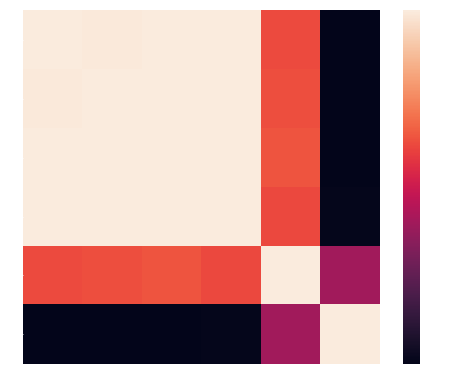

In [49]:
#import seaborn
fig = plt.figure(figsize=(8,6.5))
seaborn.heatmap(df.iloc[:,0:7].corr(method='spearman'))
plt.show()